# Exploring ACC consumption

## importing libraries

In [1]:
import os

import src.read_data as read
import src.compare_trajectories as compare
import src.plot_data as plot
import src.smooth_data as smooth
import src.export_data as export
import src.extract_event as extract
import src.examine_HighD as HighD
import src.exploit_engine_data as engine

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange
import seaborn as sns
from scipy import stats

In [2]:
plt.rcParams["font.family"] = 'Times New Roman'

In [3]:
path_OpenACC = os.getcwd()+'/data/OpenACC_data/'

## Selecting data

In [4]:
#oppening the data 
dictionnary_short = read.read_all_data(path_OpenACC,'short_setting')
dictionnary_medium = read.read_all_data(path_OpenACC,'medium setting')
dictionnary_long = read.read_all_data(path_OpenACC,'long_setting')
dictionnary_no_ACC = read.read_all_data(path_OpenACC,'no_ACC')
dictionnary_mixed = read.read_all_data(path_OpenACC,'mixed')

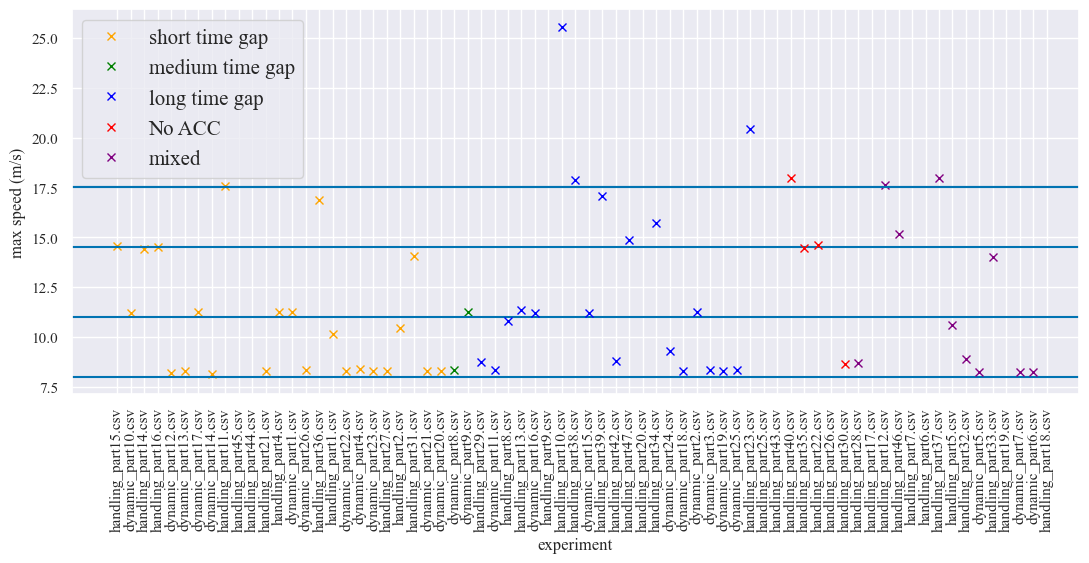

In [5]:
#plotting the max speed of the leader
plt.rcParams["figure.figsize"] = (13,5)
plot.plot_multiple_profiles(dictionnary_short, 'Orange', 'short time gap', 8)
plot.plot_multiple_profiles(dictionnary_medium, 'Green', 'medium time gap', 11)
plot.plot_multiple_profiles(dictionnary_long, 'Blue', 'long time gap', 14.5)
plot.plot_multiple_profiles(dictionnary_no_ACC, 'Red', 'No ACC', 17.5)
plot.plot_multiple_profiles(dictionnary_mixed, 'Purple', 'mixed', 17.5)

In [6]:
#creating subdictionnaries built by the max speed of the leader
short_8ms = compare.select_by_speed(dictionnary_short, 8)
short_11ms = compare.select_by_speed(dictionnary_short, 11)
short_14_5ms = compare.select_by_speed(dictionnary_short, 14.5)
short_17_5ms = compare.select_by_speed(dictionnary_short, 17.5)

medium_8ms = compare.select_by_speed(dictionnary_medium, 8)
medium_11ms = compare.select_by_speed(dictionnary_medium, 11)
medium_14_5ms = compare.select_by_speed(dictionnary_medium, 14.5)
medium_17_5ms = compare.select_by_speed(dictionnary_medium, 17.5)

long_8ms = compare.select_by_speed(dictionnary_long, 8)
long_11ms = compare.select_by_speed(dictionnary_long, 11)
long_14_5ms = compare.select_by_speed(dictionnary_long, 14.5)
long_17_5ms = compare.select_by_speed(dictionnary_long, 17.5)

no_ACC_8ms = compare.select_by_speed(dictionnary_no_ACC, 8)
no_ACC_11ms = compare.select_by_speed(dictionnary_no_ACC, 11)
no_ACC_14_5ms = compare.select_by_speed(dictionnary_no_ACC, 14.5)
no_ACC_17_5ms = compare.select_by_speed(dictionnary_no_ACC, 17.5)

mixed_8ms = compare.select_by_speed(dictionnary_mixed, 8)
mixed_11ms = compare.select_by_speed(dictionnary_mixed, 11)
mixed_14_5ms = compare.select_by_speed(dictionnary_mixed, 14.5)
mixed_17_5ms = compare.select_by_speed(dictionnary_mixed, 17.5)

    ⚠️ next cell is time consuming (about mn)

In [7]:
#comparing the speed profiles using dtw algorithm
df_8ms = compare.routine (short_8ms, medium_8ms, long_8ms, no_ACC_8ms,mixed_8ms, 'short', 'medium', 'long', 'no ACC','mixed')
df_11ms = compare.routine (short_11ms, medium_11ms, long_11ms, no_ACC_11ms,mixed_11ms, 'short', 'medium', 'long', 'no ACC','mixed')
df_14_5ms = compare.routine (short_14_5ms, medium_14_5ms, long_14_5ms, no_ACC_14_5ms,mixed_14_5ms, 'short', 'medium', 'long', 'no ACC','mixed')
df_17_5ms = compare.routine (short_17_5ms, medium_17_5ms, long_17_5ms, no_ACC_17_5ms,mixed_17_5ms, 'short', 'medium', 'long', 'no ACC','mixed')


In [16]:
#cell to skip the previous
df_8ms = pd.read_csv('data/OpenACC_data/comparison dataframes/df_8ms.csv')
del(df_8ms['Unnamed: 0'])
df_11ms = pd.read_csv('data/OpenACC_data/comparison dataframes/df_11ms.csv')
del(df_11ms['Unnamed: 0'])
df_14_5ms = pd.read_csv('data/OpenACC_data/comparison dataframes/df_14_5ms.csv')
del(df_14_5ms['Unnamed: 0'])
df_17_5ms = pd.read_csv('data/OpenACC_data/comparison dataframes/df_17_5ms.csv')
del(df_17_5ms['Unnamed: 0'])

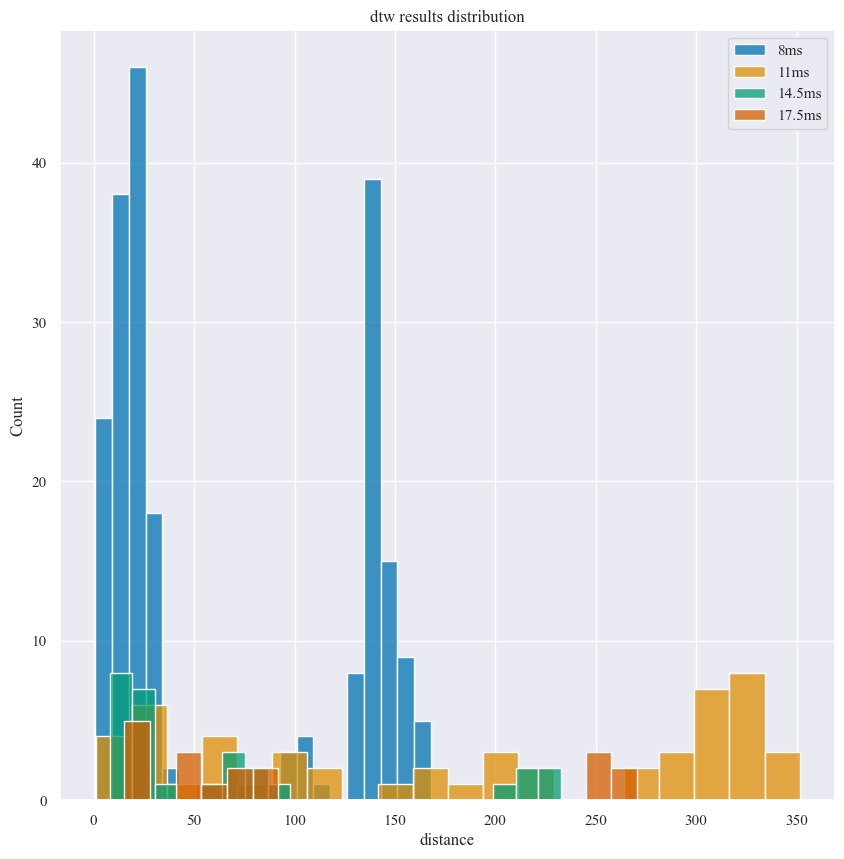

In [17]:
sns.histplot(df_8ms['distance'],bins = 20, label = '8ms')
sns.histplot(df_11ms['distance'],bins = 20, label = '11ms')
sns.histplot(df_14_5ms['distance'],bins = 20, label = '14.5ms')
sns.histplot(df_17_5ms['distance'],bins = 20, label = '17.5ms')
plt.title('dtw results distribution')
plt.legend()

In [18]:
df_11ms.sort_values(by = 'distance')

,short,medium,distance,long,no ACC,mixed
10,dynamic_part10.csv,NaN,1.192603,dynamic_part2.csv,NaN,NaN
15,dynamic_part17.csv,NaN,3.147101,dynamic_part2.csv,NaN,NaN
14,dynamic_part17.csv,NaN,10.437845,dynamic_part15.csv,NaN,NaN
9,dynamic_part10.csv,NaN,12.239866,dynamic_part15.csv,NaN,NaN
23,dynamic_part1.csv,NaN,19.930803,dynamic_part16.csv,NaN,NaN
45,NaN,dynamic_part9.csv,29.329121,dynamic_part15.csv,NaN,NaN
17,handling_part4.csv,NaN,29.348511,handling_part13.csv,NaN,NaN
24,dynamic_part1.csv,NaN,34.203167,dynamic_part15.csv,NaN,NaN
8,dynamic_part10.csv,NaN,34.738839,dynamic_part16.csv,NaN,NaN
13,dynamic_part17.csv,NaN,35.974358,dynamic_part16.csv,NaN,NaN


In [19]:
df_17_5ms.sort_values(by = 'distance')

,short,medium,distance,long,no ACC,mixed
9,handling_part36.csv,NaN,15.245814,NaN,NaN,handling_part37.csv
8,handling_part36.csv,NaN,16.957785,NaN,NaN,handling_part12.csv
17,NaN,NaN,21.396731,NaN,handling_part40.csv,handling_part37.csv
5,handling_part36.csv,NaN,22.615555,NaN,handling_part40.csv,NaN
7,handling_part11.csv,NaN,26.464597,NaN,NaN,handling_part37.csv
4,handling_part11.csv,NaN,42.623579,NaN,handling_part40.csv,NaN
16,NaN,NaN,49.171530,NaN,handling_part40.csv,handling_part12.csv
6,handling_part11.csv,NaN,49.671307,NaN,NaN,handling_part12.csv
11,NaN,NaN,54.641007,handling_part39.csv,handling_part40.csv,NaN
3,handling_part36.csv,NaN,68.142282,handling_part39.csv,NaN,NaN


In [20]:
df_14_5ms.sort_values(by = 'distance')

,short,medium,distance,long,no ACC,mixed
16,handling_part16.csv,NaN,7.878954,NaN,NaN,handling_part46.csv
17,handling_part16.csv,NaN,8.351264,NaN,NaN,handling_part33.csv
2,handling_part16.csv,NaN,8.507634,handling_part47.csv,NaN,NaN
22,NaN,NaN,9.126012,handling_part47.csv,NaN,handling_part46.csv
8,handling_part16.csv,NaN,11.667022,NaN,handling_part35.csv,NaN
25,NaN,NaN,12.674295,NaN,handling_part35.csv,handling_part33.csv
9,handling_part16.csv,NaN,16.103167,NaN,handling_part22.csv,NaN
24,NaN,NaN,16.474191,NaN,handling_part35.csv,handling_part46.csv
27,NaN,NaN,19.145026,NaN,handling_part22.csv,handling_part33.csv
18,handling_part31.csv,NaN,20.090424,NaN,NaN,handling_part46.csv


## Correcting and plotting the data

three next cells are time consuming to skip the long computation time go to the first cell in the 'data used for the experiment' that loads the dataframe that correspond to the output of those three cells

In [21]:
short_14_5ms['handling_part16.csv'] = smooth.interpolate(short_14_5ms['handling_part16.csv'])
long_14_5ms['handling_part47.csv'] = smooth.interpolate(long_14_5ms['handling_part47.csv'])
no_ACC_14_5ms['handling_part35.csv'] = smooth.interpolate(no_ACC_14_5ms['handling_part35.csv'])
mixed_14_5ms['handling_part46.csv'] = smooth.interpolate(mixed_14_5ms['handling_part46.csv'])

In [22]:
list_short_14_5_ms = ['Speed2','Speed3','Speed4','Speed5','Speed6','Speed7','Speed8','Speed9','Speed10']
list_mixed_14_5_ms = ['Speed2','Speed3','Speed4','Speed5','Speed6','Speed7','Speed9','Speed10']
list_long_14_5_ms = ['Speed2','Speed3','Speed4','Speed5','Speed6','Speed7','Speed8','Speed10','Speed11']
list_no_ACC_14_5_ms = ['Speed2','Speed3','Speed4','Speed5','Speed6','Speed7','Speed8','Speed10']


	⚠️ next cell is time consuming

In [ ]:
smooth.smoothing(short_14_5ms['handling_part16.csv'],list_short_14_5_ms, 'data/Extracted_data/dataset/short_time_gap')
smooth.smoothing(long_14_5ms['handling_part47.csv'],list_long_14_5_ms, 'data/Extracted_data/dataset/long_time_gap')
smooth.smoothing(no_ACC_14_5ms['handling_part35.csv'],list_no_ACC_14_5_ms, 'data/Extracted_data/dataset/no_ACC_time_gap')
smooth.smoothing(mixed_14_5ms['handling_part46.csv'],list_mixed_14_5_ms, 'data/Extracted_data/dataset/mixed_time_gap')

### data used for the engine bench experiment

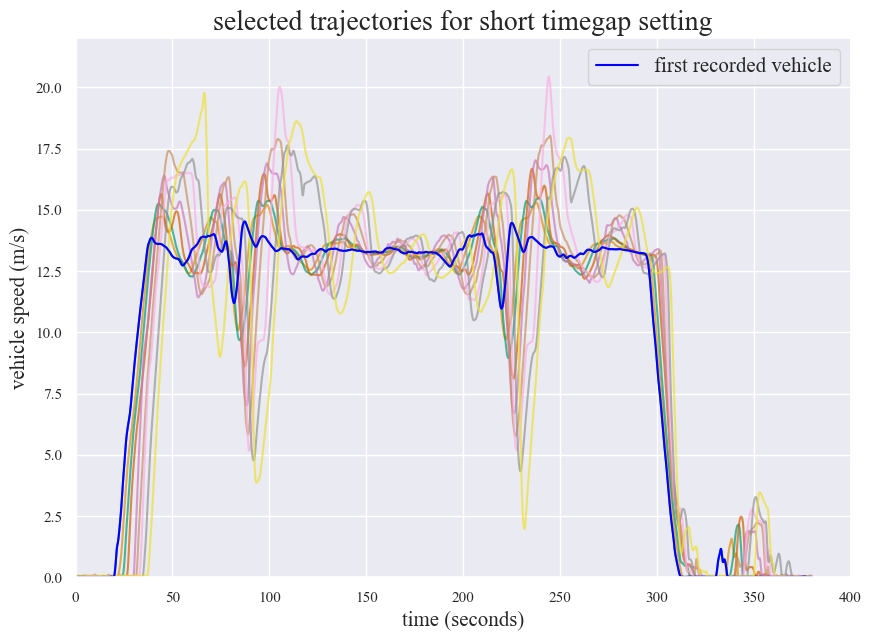

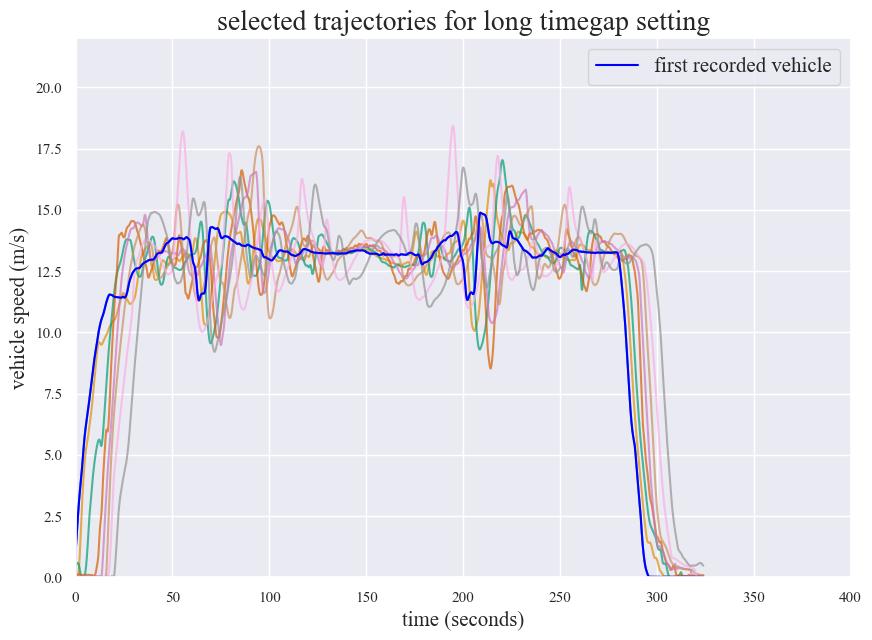

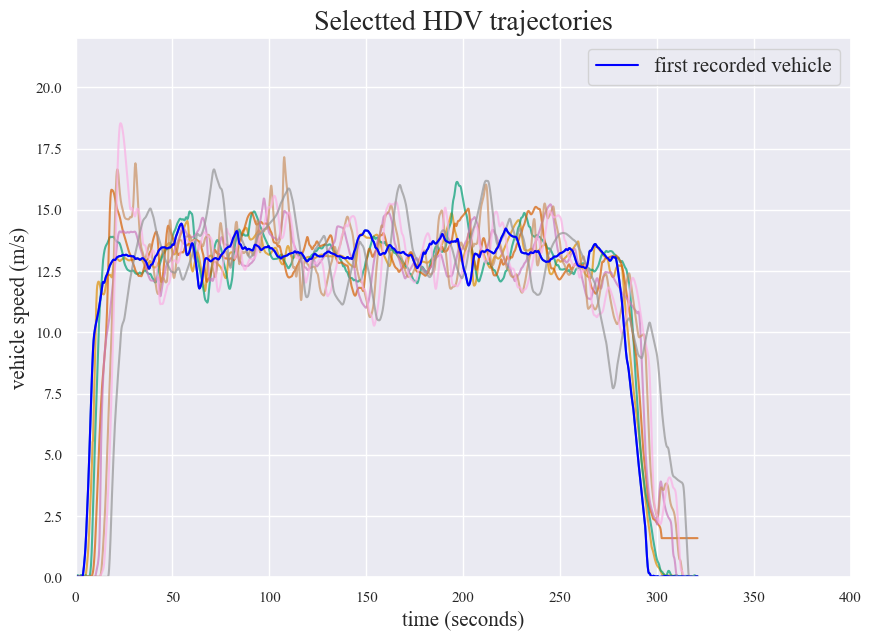

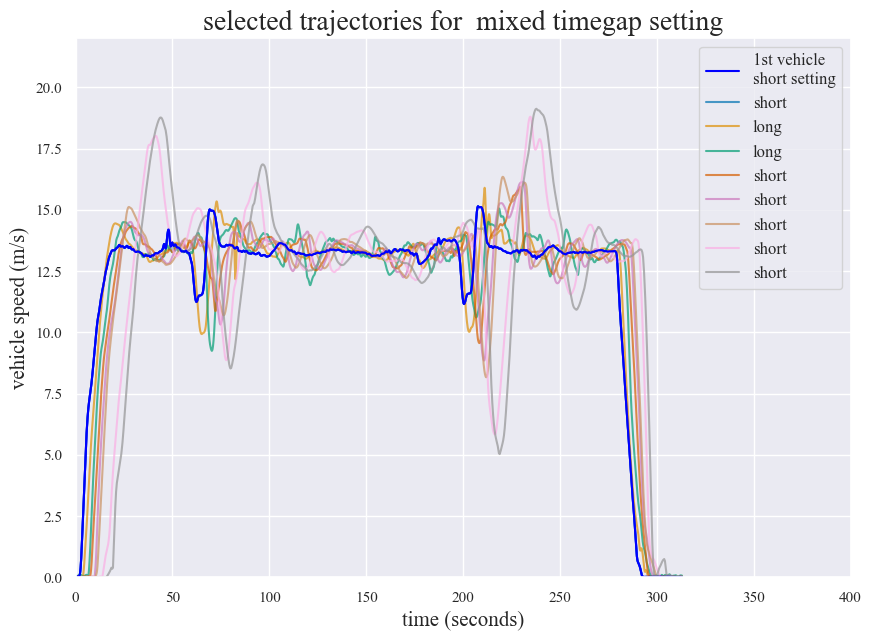

In [24]:
#this cell automatically loads the dataframe resulting of the three previous cells
plt.figure(figsize=(10, 7))
plot.plot_selected_speed('data/Extracted_data/dataset/short_time_gap.csv', 400, 22, '14.5', 'short')
plt.show()
plt.figure(figsize=(10, 7))
plot.plot_selected_speed('data/Extracted_data/dataset/long_time_gap.csv', 400, 22, '14.5', 'long')
plt.show()
plt.figure(figsize=(10, 7))
plot.plot_selected_speed('data/Extracted_data/dataset/no_ACC_time_gap.csv', 400, 22, '14.5', 'No ACC')
plt.title('Selectted HDV trajectories', size = 20)
plt.show()
plt.figure(figsize=(10, 7))
setting_list_14_5_ms = ['short','short','long','long','short','short','short','short','short']
plot.plot_selected_speed_mixed_case('data/Extracted_data/dataset/mixed_time_gap.csv', 400, 22, '14.5', 'mixed',setting_list_14_5_ms)
plt.show()

In [27]:
#export data for engine
selected_data = os.getcwd()+'/data/Extracted_data/dataset/'
data_to_export = os.listdir(selected_data)
out_dir = os.getcwd()+'/data/Extracted_data/individual_trajectories/'
for k in range(len(data_to_export)) : 
    if 'short_time_gap' in data_to_export[k] :
        #removing the last section of the short time-gap setting reccord where we we can see an acceleration/decceleration of the platoon
        #so that our comparison remains on the same type of trajectory
        out_name = data_to_export[k][:-4]
        dataframe = pd.read_csv(selected_data+data_to_export[k])
        dataFrame = dataframe[dataframe['Time']<330]
        export.export_trajectories(dataFrame,out_dir,out_name)
    else :
        out_name = data_to_export[k][:-4]
        dataframe = pd.read_csv(selected_data+data_to_export[k])
        export.export_trajectories(dataframe,out_dir,out_name)

## Exploiting engine results

### Inporting engine field results and computing consumption

In [28]:
path = 'data/Engine_results/raw_results/'
out_path = 'data/Engine_results/analysis_data/'
equivalence_table = pd.read_csv(os.getcwd()+'/data/Engine_results/engine_filename_equivalence.csv', delimiter = ';')
engine.rename_data(path,out_path,equivalence_table)

['long_ACC_1.csv',
 'long_ACC_1_sample_2.csv',
 'long_ACC_1_sample_3.csv',
 'long_ACC_2.csv',
 'long_ACC_2_sample_2.csv',
 'long_ACC_2_sample_3.csv',
 'long_ACC_3.csv',
 'long_ACC_3_sample_2.csv',
 'long_ACC_3_sample_3.csv',
 'long_ACC_4.csv',
 'long_ACC_4_sample_2.csv',
 'long_ACC_4_sample_3.csv',
 'long_ACC_5.csv',
 'long_ACC_5_sample_2.csv',
 'long_ACC_5_sample_3.csv',
 'long_ACC_6.csv',
 'long_ACC_6_sample_2.csv',
 'long_ACC_6_sample_3.csv',
 'long_ACC_7.csv',
 'long_ACC_7_sample_2.csv',
 'long_ACC_7_sample_3.csv',
 'long_ACC_8.csv',
 'long_ACC_8_sample_2.csv',
 'long_ACC_8_sample_3.csv',
 'mixed_1.csv',
 'mixed_1_sample_2.csv',
 'mixed_1_sample_3.csv',
 'mixed_2.csv',
 'mixed_2_sample_2.csv',
 'mixed_2_sample_3.csv',
 'mixed_3.csv',
 'mixed_3_sample_2.csv',
 'mixed_3_sample_3.csv',
 'mixed_4.csv',
 'mixed_4_sample_2.csv',
 'mixed_4_sample_3.csv',
 'mixed_5.csv',
 'mixed_5_sample_2.csv',
 'mixed_5_sample_3.csv',
 'mixed_6.csv',
 'mixed_6_sample_2.csv',
 'mixed_6_sample_3.csv',
 'mi

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12'),
  Text(0, 14.0, '14'),
  Text(0, 16.0, '16'),
  Text(0, 18.0, '18')])

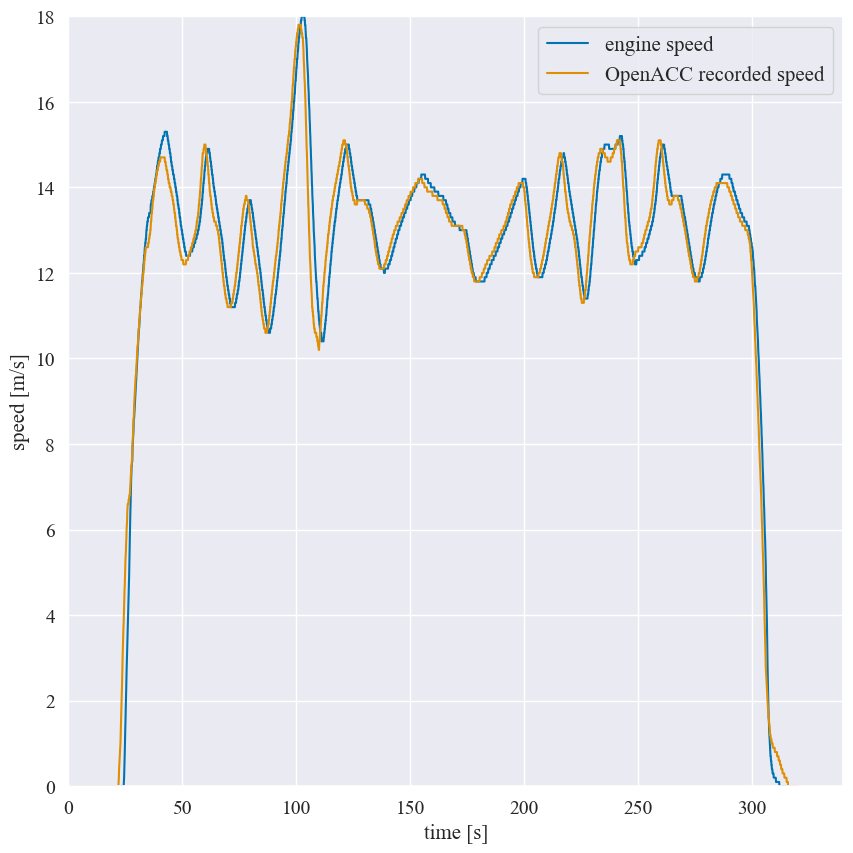

In [29]:
#comparing engine vs OpenACC recording for the speed plt.figure(figsize=(8, 6))
df = pd.read_csv('data/Engine_results/analysis_data/long_ACC_6.csv')
plt.plot(df['time'],df['speed'], label = 'engine speed')
plt.plot(df['time'],df['OpenACC_recorded_speed'], label = 'OpenACC recorded speed')
plt.legend(fontsize = '15')
plt.ylabel('speed [m/s]', size = 15)
plt.xlabel('time [s]', size = 15)
plt.xlim([0,340])
plt.ylim([0,18])
plt.xticks(size = 14)
plt.yticks(size = 14)

In [30]:
path = os.getcwd()
results_path = path + '/data/Engine_results/analysis_data/'
settings = ['short','long','mixed','no_ACC']
MOTH_co2carb = 1.84
veh_list = [[2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,9,9,9,10,10,10],
            [2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,8,8,8,10,10,10,11,11,11],
            [2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,9,9,9,10,10,10],
            [2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,10,10,10]]
df_results = engine.compute_df_emission_consumption(results_path,settings,MOTH_co2carb,veh_list)

In [31]:
df_results

,position in platoon,setting,consumption,CO2 emission
0,2.0,short,4.883442,11.178284
1,2.0,short,4.803064,10.993546
2,2.0,short,4.902940,11.222914
3,3.0,short,5.073599,11.613557
4,3.0,short,5.039027,11.534420
...,...,...,...,...
19,8.0,no_ACC,5.285756,12.098858
20,8.0,no_ACC,5.417664,12.401127
21,10.0,no_ACC,5.308989,12.152369
22,10.0,no_ACC,5.294932,12.120190


In [32]:
#comuting distance to mean for a defined rehearsal
df_results_short = df_results[df_results['setting']=='short']
df_results_short = df_results_short.groupby(['position in platoon'], as_index=False).agg({'consumption':['mean','std']})
df_results_short.columns = ['position in platoon', 'consumption_mean', 'consumption_std']
df_results_short['setting'] = ["short" for k in range(len(df_results_short['position in platoon']))]

df_results_long = df_results[df_results['setting']=='long']
df_results_long = df_results_long.groupby(['position in platoon'], as_index=False).agg({'consumption':['mean','std']})
df_results_long.columns = ['position in platoon', 'consumption_mean', 'consumption_std']
df_results_long['setting'] = ["short" for k in range(len(df_results_long['position in platoon']))]

df_results_mixed = df_results[df_results['setting']=='mixed']
df_results_mixed = df_results_mixed.groupby(['position in platoon'], as_index=False).agg({'consumption':['mean','std']})
df_results_mixed.columns = ['position in platoon', 'consumption_mean', 'consumption_std']
df_results_mixed['setting'] = ["short" for k in range(len(df_results_mixed['position in platoon']))]

df_results_HDV = df_results[df_results['setting']=='no_ACC']
df_results_HDV = df_results_HDV.groupby(['position in platoon'], as_index=False).agg({'consumption':['mean','std']})
df_results_HDV.columns = ['position in platoon', 'consumption_mean', 'consumption_std']
df_results_HDV['setting'] = ["short" for k in range(len(df_results_HDV['position in platoon']))]

df_stats = pd.concat([df_results_short,df_results_long,df_results_mixed,df_results_HDV])


0.16534110526422197


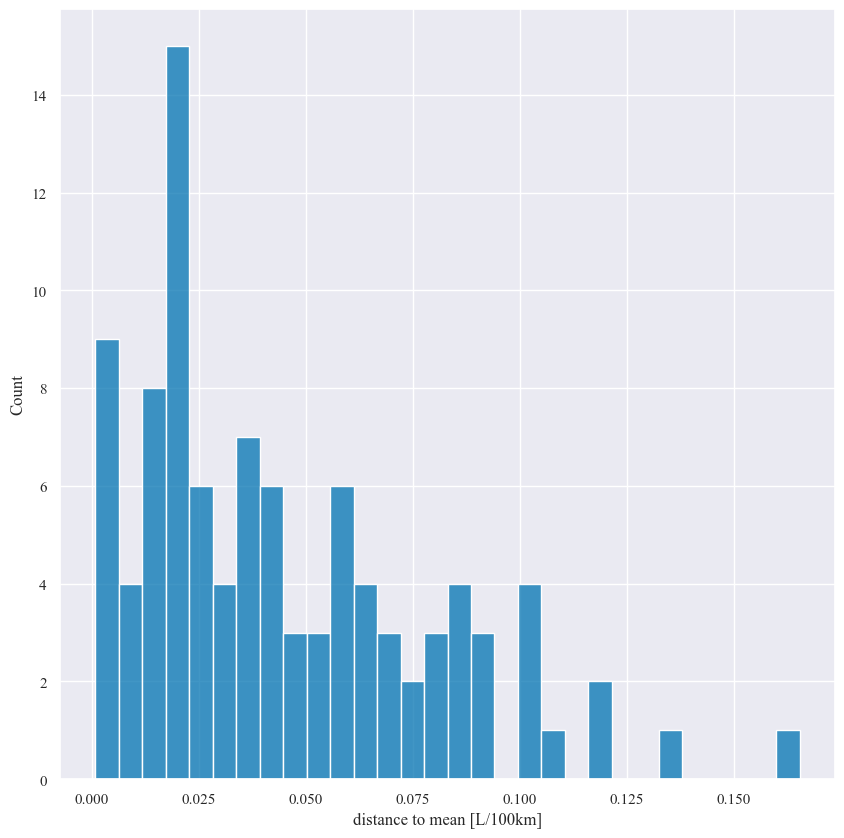

0.8407934450106059 0.6706631582169706


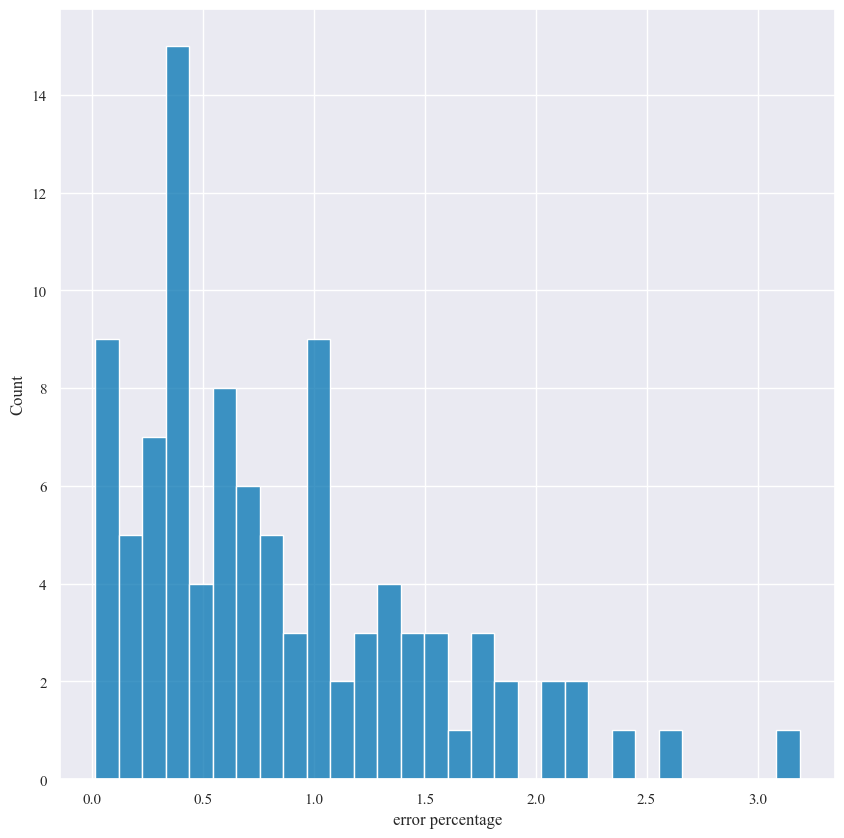

In [33]:
#plotting distance to mean distribution
array_stats = []
count = 0
for k in range(len(df_stats['setting'])):
    while count <3 :
        array_stats.append(list(df_stats['consumption_mean'])[k])
        count+=1
    count=0
df_results['mean consumption'] = array_stats

df_results['distance to mean [L/100km]'] = np.abs(df_results['mean consumption']-df_results['consumption'])
df_results['error percentage'] = df_results['distance to mean [L/100km]']/df_results['consumption']*100
sns.histplot(df_results['distance to mean [L/100km]'],bins = 30)
print(max(df_results['distance to mean [L/100km]']))
plt.show()
sns.histplot(df_results['error percentage'],bins = 30)
print(np.mean(df_results['error percentage']),np.median(df_results['error percentage']))

### Computing mixed model regression for each platoon

In [35]:
#compute linear regression
df_results = engine.compute_df_emission_consumption(results_path,settings,MOTH_co2carb,veh_list)
linereg = engine.compute_regular_regression(df_results)

In [36]:
display(linereg.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     105.8
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           6.61e-41
Time:                        10:57:09   Log-Likelihood:                 18.404
No. Observations:                  99   AIC:                            -20.81
Df Residuals:                      91   BIC:                          -0.04656
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      4.7596      0.096     49.717      0.000       4.569       4.950
setting[T.mixed]              -0.1923      0.140     -1.369      0.174      -0.471       0.087
setting[T.no_ACC]             -0.2813      0.142     -1.975      0.051      -0.564       0.002
setting[T.short]              -0.6512      0.140     -4.654      0.000      -0.929      -0.373
position                       0.0941      0.014      6.727      0.000       0.066       0.122
position:setting[T.mixed]      0.0142      0.021      0.663      0.509      -0.028       0.057
position:setting[T.no_ACC]     0.0067      0.022      0.303      0.763      -0.037       0.051
position:setting[T.short]      0.2050      0.021      9.777      0.000       0.163       0.247
==============================================================================
Omnibus:                        1.259   Durbin-Watson:                   1.038
Prob(Omnibus):                  0.533   Jarque-Bera (JB):                1.217
Skew:                          -0.263   Prob(JB):                        0.544
Kurtosis:                       2.864   Cond. No.                         72.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#compute mixed LM that computes the model for each platoon
mixedLM_ML = engine.compute_regression_mixedlm(df_results,False, "consumption~position*setting")
mixedLM_REML = engine.compute_regression_mixedlm(df_results, True, "consumption~position*setting")


In [38]:
display(mixedLM_ML.summary())
display(mixedLM_REML.summary())


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
=====================================================================
Model:                MixedLM     Dependent Variable:     consumption
No. Observations:     99          Method:                 ML         
No. Groups:           33          Scale:                  0.0048     
Min. group size:      3           Log-Likelihood:         72.1622    
Max. group size:      3           Converged:              Yes        
Mean group size:      3.0                                            
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                   4.760    0.153 31.191 0.000  4.461  5.059
setting[T.mixed]           -0.192    0.224 -0.859 0.390 -0.631  0.246
setting[T.no_ACC]          -0.281    0.227 -1.239 0.215 -0.726  0.164
setting[T.short]           -0.651    0.223 -2.920 0.004 -1.088 -0.214
position                    0.094    0.022  4.220 0.000  0.050  0.138
position:setting[T.mixed]   0.014    0.034  0.416 0.677 -0.053  0.081
position:setting[T.no_ACC]  0.007    0.035  0.190 0.849 -0.062  0.076
position:setting[T.short]   0.205    0.033  6.134 0.000  0.139  0.270
Group Var                   0.036    0.162                           
=====================================================================

"""

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
=====================================================================
Model:                MixedLM     Dependent Variable:     consumption
No. Observations:     99          Method:                 REML       
No. Groups:           33          Scale:                  0.0048     
Min. group size:      3           Log-Likelihood:         54.4912    
Max. group size:      3           Converged:              Yes        
Mean group size:      3.0                                            
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                   4.760    0.175 27.148 0.000  4.416  5.103
setting[T.mixed]           -0.192    0.257 -0.748 0.455 -0.696  0.312
setting[T.no_ACC]          -0.281    0.261 -1.079 0.281 -0.792  0.230
setting[T.short]           -0.651    0.256 -2.541 0.011 -1.153 -0.149
position                    0.094    0.026  3.673 0.000  0.044  0.144
position:setting[T.mixed]   0.014    0.039  0.362 0.717 -0.063  0.091
position:setting[T.no_ACC]  0.007    0.040  0.166 0.869 -0.073  0.086
position:setting[T.short]   0.205    0.038  5.339 0.000  0.130  0.280
Group Var                   0.048    0.236                           
=====================================================================

"""

In [39]:
#display mixedLM for the 2 groups short time gap platoon vs other paltoons
df_results = engine.compute_df_emission_consumption(results_path,settings,MOTH_co2carb,veh_list)

data_test_short = df_results 
data_test_short['is_short'] = ['short' if list(data_test_short['setting'])[k]== 'short' else 'no_short' for k in range(len(list(data_test_short['setting'])))]
data = data_test_short
data.columns = ['position','setting','consumption','CO2_emission','is_short']
two_reg_mixedLM_ML = engine.compute_mixedLM_specific_case(data_test_short, False, 'consumption~position*is_short')
del(data_test_short['grp'])
two_reg_mixedLM_REML = engine.compute_mixedLM_specific_case(data_test_short, True, 'consumption~position*is_short')


In [13]:
display(two_reg_mixedLM_ML.summary())
display(two_reg_mixedLM_REML.summary())

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
=====================================================================
Model:                MixedLM     Dependent Variable:     consumption
No. Observations:     99          Method:                 ML         
No. Groups:           33          Scale:                  0.0048     
Min. group size:      3           Log-Likelihood:         69.2453    
Max. group size:      3           Converged:              Yes        
Mean group size:      3.0                                            
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                   4.590    0.101 45.494 0.000  4.392  4.788
is_short[T.short]          -0.482    0.204 -2.357 0.018 -0.882 -0.081
position                    0.103    0.016  6.577 0.000  0.072  0.134
position:is_short[T.short]  0.196    0.031  6.250 0.000  0.135  0.258
Group Var                   0.043    0.194                           
=====================================================================

"""

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
=====================================================================
Model:                MixedLM     Dependent Variable:     consumption
No. Observations:     99          Method:                 REML       
No. Groups:           33          Scale:                  0.0048     
Min. group size:      3           Log-Likelihood:         59.4829    
Max. group size:      3           Converged:              Yes        
Mean group size:      3.0                                            
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                   4.590    0.108 42.648 0.000  4.379  4.801
is_short[T.short]          -0.482    0.218 -2.210 0.027 -0.909 -0.054
position                    0.103    0.017  6.165 0.000  0.070  0.136
position:is_short[T.short]  0.196    0.033  5.859 0.000  0.131  0.262
Group Var                   0.049    0.231                           
=====================================================================

"""

/Users/thibault.charlottin/opt/anaconda3/envs/phD_Data_Analysis/lib/python3.10/site-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


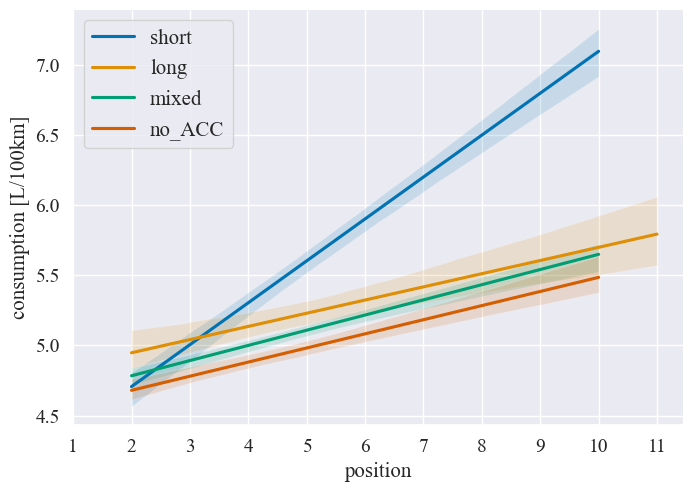

In [14]:
#plot the results of the mixedLM model that split data into the 4 platoons
df = engine.compute_df_emission_consumption(results_path,settings,MOTH_co2carb,veh_list)
df.columns = ['position','setting','consumption','CO2_emission']
plot.plot_consumption_regression_engine(df, "consumption~position*setting", 'setting')

/Users/thibault.charlottin/opt/anaconda3/envs/phD_Data_Analysis/lib/python3.10/site-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


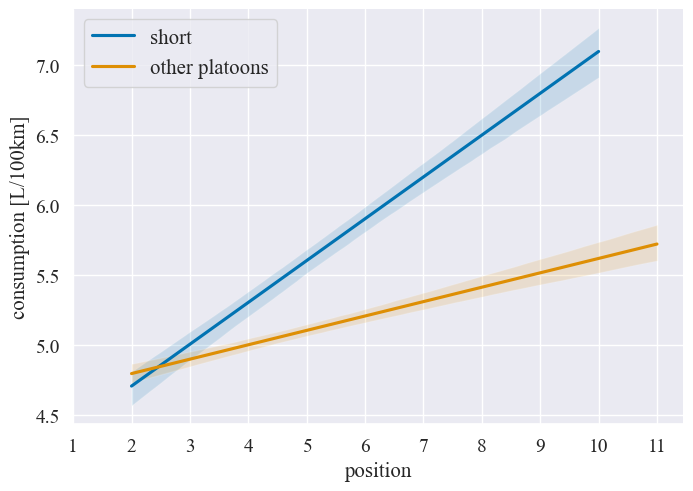

In [15]:
#plot mixedLM result that split data into 2 group (short platoon and other platoons)
df['is_short'] = ['short' if list(df['setting'])[k]== 'short' else 'other platoons' for k in range(len(list(df['setting'])))]
plot.plot_consumption_regression_engine(df, "consumption~position*is_short", 'is_short')

## Analysis on how often does this specific situation might happen in traffic

### Characterisition of the acceleration/deceleration phase

(0.0, 16.0)

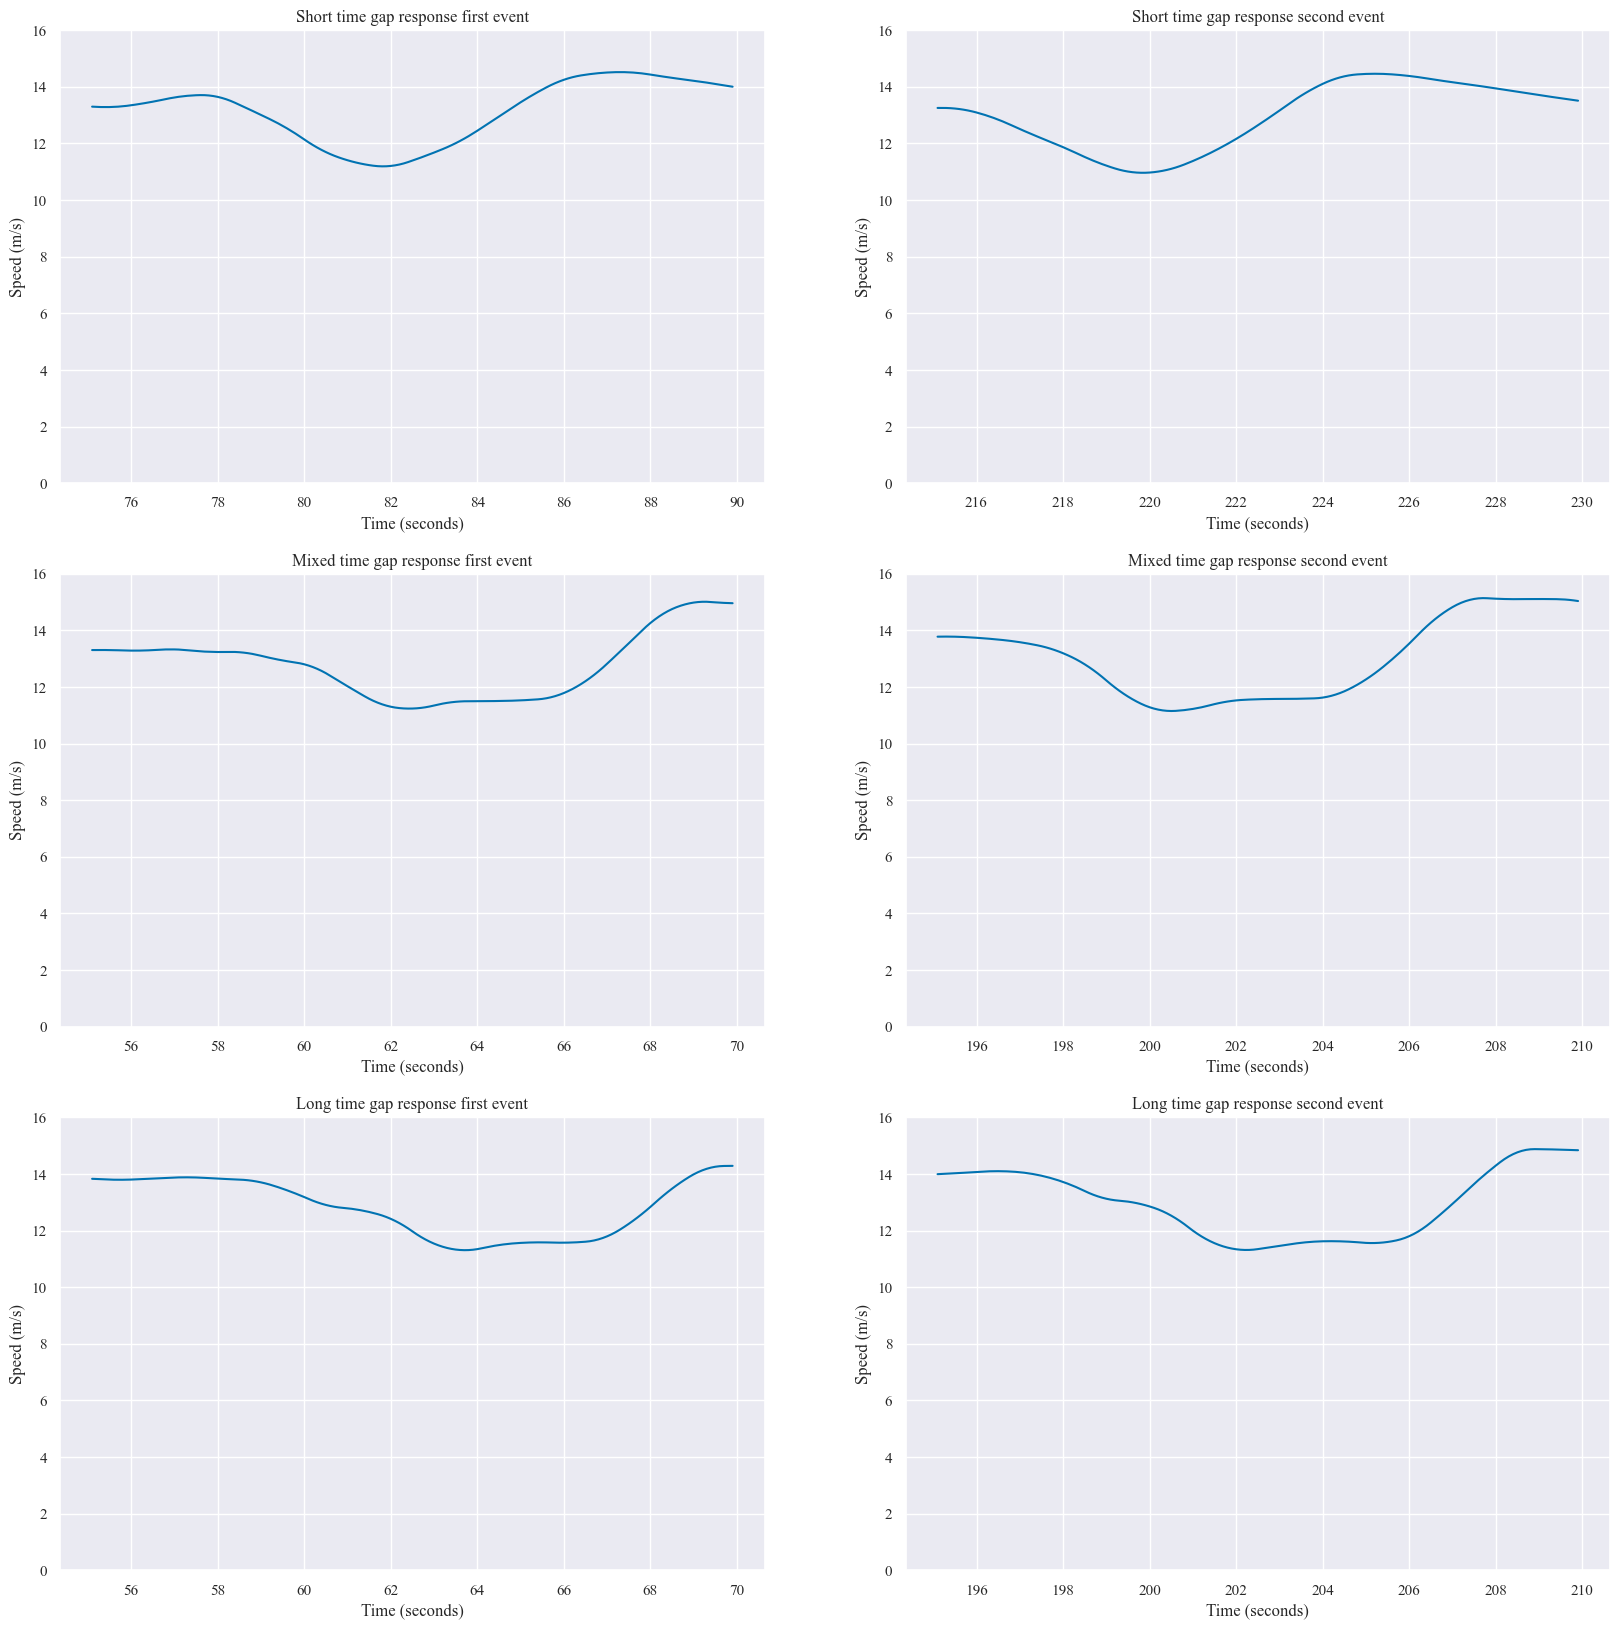

In [41]:
#determining the scope of the phase and the specific time gap
Leader_data_short = pd.read_csv('data/Extracted_data/individual_trajectories/short_time_gap_Veh_nb_1.csv')
Leader_data_mixed = pd.read_csv('data/Extracted_data/individual_trajectories/mixed_time_gap_Veh_nb_1.csv')
Leader_data_long = pd.read_csv('data/Extracted_data/individual_trajectories/long_time_gap_Veh_nb_1.csv')


first_event_short = Leader_data_short[(Leader_data_short['Time']<90) &  (Leader_data_short['Time']>75)]
second_event_short = Leader_data_short[(Leader_data_short['Time']>215) &  (Leader_data_short['Time']<230)]

first_event_mixed = Leader_data_mixed[(Leader_data_mixed['Time']<70) &  (Leader_data_mixed['Time']>55)]
second_event_mixed = Leader_data_mixed[(Leader_data_mixed['Time']>195) &  (Leader_data_mixed['Time']<210)]

first_event_long = Leader_data_long[(Leader_data_long['Time']>55) &  (Leader_data_long['Time']<70)]
second_event_long = Leader_data_long[(Leader_data_long['Time']>195) &  (Leader_data_long['Time']<210)]

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))

ax[0,0].plot(first_event_short['Time'],first_event_short['Speed'])
ax[0,0].set_xlabel('Time (seconds)')
ax[0,0].set_ylabel('Speed (m/s)')
ax[0,0].set_ylim([0,16])
ax[0,0].set_title('Short time gap response first event')
ax[0,1].plot(second_event_short['Time'],second_event_short['Speed'])
ax[0,1].set_title('Short time gap response second event')
ax[0,1].set_xlabel('Time (seconds)')
ax[0,1].set_ylabel('Speed (m/s)')
ax[0,1].set_ylim([0,16])

ax[1,0].plot(first_event_mixed['Time'],first_event_mixed['Speed'])
ax[1,0].set_title('Mixed time gap response first event')
ax[1,0].set_xlabel('Time (seconds)')
ax[1,0].set_ylabel('Speed (m/s)')
ax[1,0].set_ylim([0,16])
ax[1,1].plot(second_event_mixed['Time'],second_event_mixed['Speed'])
ax[1,1].set_title('Mixed time gap response second event')
ax[1,1].set_xlabel('Time (seconds)')
ax[1,1].set_ylabel('Speed (m/s)')
ax[1,1].set_ylim([0,16])

ax[2,0].plot(first_event_long['Time'],first_event_long['Speed'])
ax[2,0].set_title('Long time gap response first event')
ax[2,0].set_xlabel('Time (seconds)')
ax[2,0].set_ylabel('Speed (m/s)')
ax[2,0].set_ylim([0,16])
ax[2,1].plot(second_event_long['Time'],second_event_long['Speed'])
ax[2,1].set_title('Long time gap response second event')
ax[2,1].set_xlabel('Time (seconds)')
ax[2,1].set_ylabel('Speed (m/s)')
ax[2,1].set_ylim([0,16])

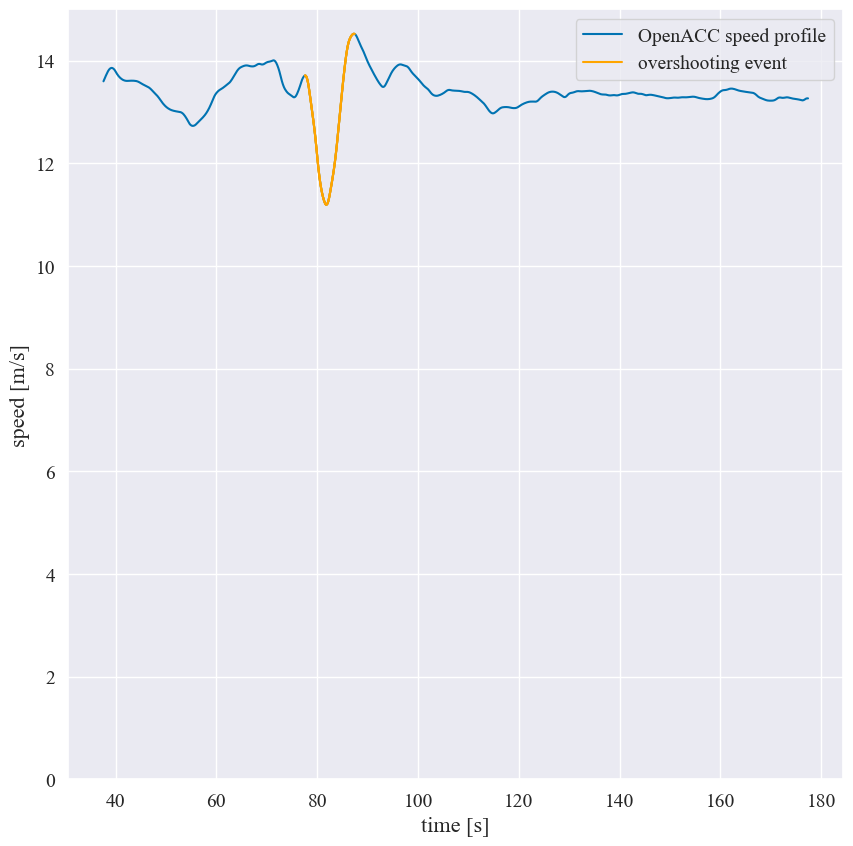

In [43]:
#plotting an overzshooting event
df =pd.read_csv('data/Extracted_data/dataset/short_time_gap.csv')
df  = df[(df['Time']<177.5) & (df['Time']>37.5)]
df2 = df[(df['Time']>77.5) & (df['Time']<87.5)]
plt.plot(df['Time'],df['Speed2'], label = 'OpenACC speed profile')
plt.plot(df2['Time'],df2['Speed2'], color = 'orange', label = 'overshooting event')
plt.plot(df2['Time'],df2['Speed2'], color = 'orange')
plt.plot(df2['Time'],df2['Speed2'], color = 'orange')
plt.xlabel('time [s]', size = 16)
plt.ylabel('speed [m/s]', size = 16)
plt.ylim([0,15])
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(fontsize = 14)

In [47]:
Characterization_df = pd.DataFrame()
path = os.getcwd()+'/data/Extracted_data/individual_trajectories/'
traj_names = ['short_time_gap_Veh_nb_1.csv','short_time_gap_Veh_nb_1.csv','long_time_gap_Veh_nb_1.csv',
              'long_time_gap_Veh_nb_1.csv','mixed_time_gap_Veh_nb_1.csv','mixed_time_gap_Veh_nb_1.csv']
out_names = ['short_1','short_2','long_1','long_2','mixed_1','mixed_2']
time_in_list = [75,215,55,195,55,195]
time_out_list = [90,230,70,210,70,210]
for k in range(len(traj_names)):
    array = extract.characterize_singular_event(path,traj_names[k],time_in_list[k],time_out_list[k])
    Characterization_df[out_names[k]] = array
index = np.array(['dv1 (m/s)','dt1 (s)','dv2 (m/s)','dt2 (s)'])
Characterization_df = Characterization_df.set_index(index)
Characterization_df

,short_1,short_2,long_1,long_2,mixed_1,mixed_2
dv1 (m/s),-2.50996,-2.283546,-2.566737,-2.775418,-2.085447,-2.622545
dt1 (s),4.10000,4.500000,6.300000,5.600000,5.400000,5.100000
dv2 (m/s),3.32916,3.497504,2.977880,3.561804,3.773081,3.987709
dt2 (s),5.50000,5.400000,6.200000,6.700000,6.900000,7.200000


In [48]:
#extracting the mean values
mean_array = extract.characterize_mean_event(path,traj_names,time_in_list,time_out_list)
mean_df = pd.DataFrame(mean_array)
index = np.array(['dv1 (m/s)','dt1 (s)','dv2 (m/s)','dt2 (s)'])
mean_df = mean_df.set_index(index)
mean_df

,0
dv1 (m/s),-2.473942
dt1 (s),5.166667
dv2 (m/s),3.521190
dt2 (s),6.316667


### Selecting dataframes to be used in HighD and ExiD

to run this part you need to download those two datasets using the links presented in the README file

to skip this part you can use the cell at the end of the section that compiles all the reuslts 

In [ ]:
#analyzing mean speed for every reccord

path_HighD= 'data/HighD_data/'
files = sorted(os.listdir(path_HighD))
speedlist_highD = []
for k in files :
    df = pd.read_csv(path_HighD+k)
    speedlist_highD.append(np.mean(np.abs(df['x_speed']+df['yspeed'])))
HighD_speed = pd.DataFrame({'name':files,'mean speed':speedlist_highD})
HighD_speed.to_csv('HighD mean speed.csv')

path_ExiD= 'data/ExiD_data/'
files = sorted(os.listdir(path_ExiD))
speedlist_ExiD = []
for k in files :
    df = pd.read_csv(path_ExiD+k)
    speedlist_ExiD.append(np.mean(np.abs(df['x_speed']+df['yspeed'])))
ExiD_speed = pd.DataFrame({'name':files,'mean speed':speedlist_ExiD})
ExiD_speed.to_csv('ExiD mean speed.csv')

In [9]:
total_time_HighD = HighD.count_time("HighD_corrected_data/")

  0%|          | 0/59 [00:00<?, ?it/s]

39267489.0

In [10]:
total_time_ExiD = HighD.count_time("ExiD_corrected_data/")
print(total_time_HighD+total_time_ExiD)

  0%|          | 0/54 [00:00<?, ?it/s]

57086544.0


In [12]:
print(((total_time_HighD+total_time_ExiD)/3.6)/1250)

12685.898666666666


In [48]:
HighD_speed = pd.read_csv('HighD mean speed.csv')
ExiD_speed = pd.read_csv('ExiD mean speed.csv')

In [67]:
HighD_mean = []
ExiD_mean = []
path_HighD = '/data/HighD_data/'
path_ExiD = 'data/ExiD_data/'
HighD_files = os.listdir(path_HighD)
ExiD_files = os.listdir(path_ExiD)
for k in HighD_files : 
    df = pd.read_csv(path_HighD+k)
    df = df.groupby('id').mean()
    for k in list(df['x_speed']):
        HighD_mean.append(np.abs(k))
for k in ExiD_files : 
    df = pd.read_csv(path_ExiD+k)
    df = df.groupby('id').mean()
    for k in list(df['x_speed']):
        ExiD_mean.append(np.abs(k))

Text(0.5, 1.0, 'Mean speed distrbution: HighD and ExiD')

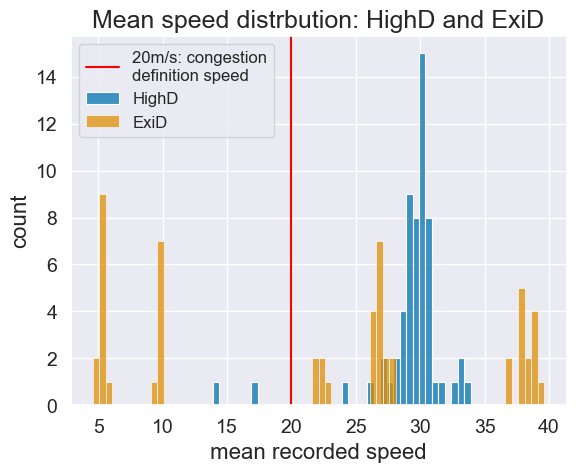

In [89]:
sns.histplot(HighD_speed['mean speed'],binwidth= 0.5,label = 'HighD')
sns.histplot(ExiD_speed['mean speed'],binwidth= 0.5, label = 'ExiD')
plt.axvline(x=20, color = 'red', label = '20m/s: congestion\ndefinition speed')
plt.xticks(size = 14);plt.yticks(size = 14)
plt.xlabel('mean recorded speed [m/s]',size = 16);plt.ylabel('count',size = 16)
plt.legend( fontsize="12", loc = 'upper left')
plt.title('Mean speed distrbution: HighD and ExiD', size = 18)

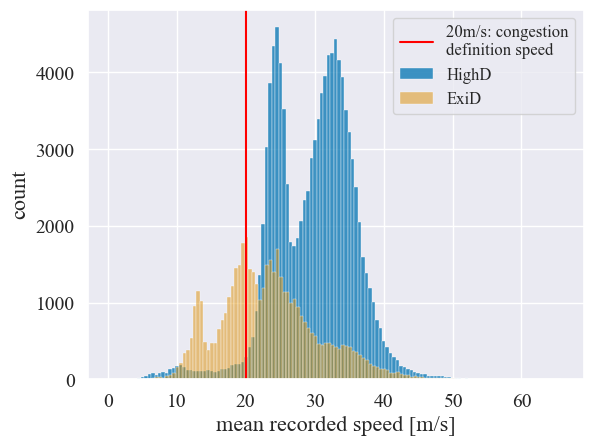

In [69]:

sns.histplot(HighD_mean,binwidth= 0.5,label = 'HighD')
sns.histplot(ExiD_mean,binwidth= 0.5,alpha = 0.5, label = 'ExiD')
plt.axvline(x=20, color = 'red', label = '20m/s: congestion\ndefinition speed')
plt.xticks(size = 14);plt.yticks(size = 14)
plt.xlabel('mean recorded speed [m/s]',size = 16);plt.ylabel('count',size = 16)
plt.legend( fontsize="12", loc = 'upper right')
#plt.title('Mean speed distrbution: HighD and ExiD', size = 18)


In [9]:
HighD_speed_selection = HighD_speed[HighD_speed['mean speed']<20]
ExiD_speed_selection = ExiD_speed[ExiD_speed['mean speed']<20]

In [49]:
mean_value,std_err = extract.get_mean_distance(path,traj_names,time_in_list,time_out_list)
print(mean_value,std_err)

1.6785543953406603 0.7013941217419557


	⚠️ next cell is time consuming

In [ ]:
path_HighD= 'comparison_datasets/'
tau = 5
time_window = 15
proportions_out = HighD.running_all_datasets (path_HighD,tau,time_window,
                         path,traj_names,time_in_list,time_out_list,
                         mean_value, std_err)

In [15]:
proportions_out_mean = np.round(np.mean(proportions_out),4)
proportions_out_mean

0.0008

RESULTS CELL FOR HIGHD EXID SECTION

In [51]:
mean_value,std_err = extract.get_mean_distance(path,traj_names,time_in_list,time_out_list)
#total trajectories time in the two datasets
total_time_HighD = 39267489.0
total_time_ExiD = 57086544.0

#dataset that cover the mean speed for each record
HighD_mean_speed = pd.read_csv('HighD mean speed.csv')
ExiD_mean_speed = pd.read_csv('ExiD mean speed.csv')

#results of the event identification algorithm
proportions_out_mean = 0.0008
total_time_event_HighD_ExiD = 12685.8986

In [52]:
def adapt_to_congestion(df_results,setting,treiber_value_congestion):
    df = df_results[df_results['setting']==setting]
    df = df.groupby('position in platoon').mean()
    treiber_ratio = treiber_value_congestion/list(df['consumption'])[0]
    change_list = [treiber_value_congestion]
    for k in range(1,len(df['consumption'])):
        change_list.append(change_list[k-1]+(list(df['consumption'])[k]-list(df['consumption'])[k-1])*treiber_ratio)
    df['Treiber consumption'] = change_list
    df['position in platoon'] = df.index
    return df

In [54]:
treiber_value_congestion = 14.7
df_results = engine.compute_df_emission_consumption(results_path,settings,MOTH_co2carb,veh_list)

df_short_treiber = adapt_to_congestion(df_results,'short',treiber_value_congestion)
df_long_treiber = adapt_to_congestion(df_results,'long',treiber_value_congestion)
df_mixed_treiber = adapt_to_congestion(df_results,'mixed',treiber_value_congestion)
df_HDV_treiber = adapt_to_congestion(df_results,'no_ACC',treiber_value_congestion)

/var/folders/mq/cjj_sp3148z4splt8wm1sp2hkxk65b/T/ipykernel_15520/3654239783.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('position in platoon').mean()
/var/folders/mq/cjj_sp3148z4splt8wm1sp2hkxk65b/T/ipykernel_15520/3654239783.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('position in platoon').mean()
/var/folders/mq/cjj_sp3148z4splt8wm1sp2hkxk65b/T/ipykernel_15520/3654239783.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select 

In [55]:
df_HDV_treiber

,consumption,CO2 emission,Treiber consumption,position in platoon
position in platoon,,,,
2.0,4.612314,10.606131,14.700000,2.0
3.0,4.697320,10.850746,14.970924,3.0
4.0,4.995685,11.486911,15.921850,4.0
5.0,4.970523,11.429535,15.841653,5.0
6.0,4.952109,11.381572,15.782967,6.0
7.0,5.466671,12.513136,17.422938,7.0
8.0,5.368145,12.287667,17.108923,8.0
10.0,5.297599,12.126297,16.884087,10.0


In [56]:
def compute_impact(df_consumption,platoon_lenght,setting,event_occurence, classic_consumption):
    df = df_consumption[df_consumption['position in platoon']<= platoon_lenght]
    return (np.mean(df['Treiber consumption'])-classic_consumption)*event_occurence+ classic_consumption

In [57]:
platoon_lenghts = []
short = compute_impact(df_short_treiber,10,"short",0.0008,treiber_value_congestion)
long = compute_impact(df_long_treiber,10,"long",0.0008,treiber_value_congestion)
mixed = compute_impact(df_mixed_treiber,10,"mixed",0.0008,treiber_value_congestion)
HDV = treiber_value_congestion
print(short,long,mixed,HDV)
print(short/HDV,long/HDV,mixed/HDV)

14.702513380026355 14.701423804087979 14.700954322339964 14.7
1.0001709782330854 1.000096857420951 1.0000649198870724


In [58]:
print('percentage short', (short/HDV-1))
print('percentage long', (long/HDV-1))
print('percentage mixed', (mixed/HDV-1))

percentage short 0.00017097823308542814
percentage long 9.685742095100203e-05
percentage mixed 6.491988707235663e-05
